In [1]:
import pandas as pd
import numpy as np
import json

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from scipy.linalg import norm

# local library
from preproc import *

In [27]:
sw = set(stopwords.words('english') + ["[applause]", "[music]"] \
    + ["that's", "they'll", "they're", "we'll", "we're", "i'm", "i'll", "they've",
 "i've", "here's", "it'll", "we've", "let's", "he's", "there's", "i'd", "what's"])

In [3]:
with open('speeches.json') as f:
    speeches = json.load(f)

In [4]:
bow = create_bow(speeches)
bow

,index,speaker,date,speech,title,transcript_type
id,,,,,,
oWlLZZ8pcp8,8,trump,2019-04-28T02:07:41Z,[Music] [Music] [Music] [Music] [Music] [Appla...,Watch Live: President Trump's MAGA Rally in Gr...,speech
Z6N1WdJgnLo,47,biden,2019-04-29T21:04:46Z,[Applause] [Music] my name [Applause] thank yo...,Joe Biden holds first 2020 campaign rally,speech
WIwGrZKdsY0,9,trump,2019-05-09T03:55:17Z,[Music] from the leaves of Minnesota [Music] a...,FULL RALLY: President Trump in Panama City Bea...,speech
u-AEAq7jzcU,48,biden,2019-05-18T19:53:18Z,so let's do this please welcome my husband Joe...,Joe Biden speaks during a campaign rally in Ph...,speech
GgINUxecNrg,10,trump,2019-05-21T00:39:36Z,[Music] from the laser Minnesota [Music] the T...,"FULL RALLY: President Trump in Montoursville, ...",speech
...,...,...,...,...,...,...
TPYi8rZEOFo,143,trump,2020-10-15T21:03:06Z,michigan peter meyer the state republican chai...,President Donald Trump FULL SPEECH at Greenvil...,speech
ytiJUCjZoNk,144,biden,2020-10-16T01:43:02Z,on to the vote what will our future look like ...,Former Vice President Joe Biden Town Hall Inte...,interview
xjxN225zvk4,147,pence,2020-10-16T20:12:51Z,[Applause] [Music] [Applause] [Music] it it's ...,VP Pence in Selma (Full speech),speech


In [28]:
import string
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem.snowball import SnowballStemmer

def my_tokenizer(document):
        #tk = WhitespaceTokenizer()
        #stemmer = SnowballStemmer("english")
        # Break the sentence into tokens based on whitespace
        for token in document.split():
            # Apply preprocessing to the token
            token = token.lower().strip()
            token = re.sub(r'[_*:!?& ]', '', token)

            # If punctuation, ignore token and continue
            if all(char in set(string.punctuation) for char in token):
                continue
                
            # if empty str, continue
            if token == '':
                continue
                
            # skip stopwords
            if token in sw:
                continue

            # stem the token and yield
            #stem = stemmer.stem(token)
            yield token

In [12]:
# testing. no better than nltk out of the box
from spacy.tokenizer import Tokenizer
from spacy.lang.en import English
import re

nlp = nlp = English(disable=['ner','parser','tagger']) # , disable=['ner','parser','tagger']

def spacy_tokenize(text):
    text = text.lower().replace('[applause]','').replace('[music]','')
    tokens = [x.text for x in nlp(text)]
    tokens = [re.sub(r'[_*:!?& ]', '', tok) for tok in tokens]
    tokens = [tok for tok in tokens if tok != '']
    return tokens
    #text.lower().strip().strip('_').strip('*')

# Combined 1,2,3 grams

In [29]:
# 

vectorizer = CountVectorizer(#max_features=5000, # only top 5k words
                             min_df=2,          # words must appear in this many speeches to count
                             #max_df=0.9,        # words can't appear in more % of speeches than this.  
                             stop_words=stopwords.words('english'),
                             tokenizer=my_tokenizer,
                             ngram_range=(1,3)  # unigrams, bigrams, trigrams
                            )

counts = vectorizer.fit_transform(bow['speech'])

In [30]:
counts_df = pd.DataFrame(counts.toarray())
counts_df.index.name = 'speech'
#tfidf.columns = tfidf.apply(lambda x: vocab_r[x.name])
counts_df.columns = vectorizer.get_feature_names()

In [31]:
counts_df.head(3)

,"""i","""in","""the","$10,000","$10,000 family","$10,000,000,000","$10,000,000,000 cameron","$10,000,000,000 cameron lng","$2,000","$2,000 boldly",...,zoom right right,zoz,zoz kid,zoz kid jean,zubik,zubik pittsburgh,zubik pittsburgh came,zucker,zuckerberg,♪
speech,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
# convert counts into tfidf
transformer = TfidfTransformer(smooth_idf=False)
tfidf = transformer.fit_transform(counts)

In [44]:
tfidf_df = pd.DataFrame(tfidf.toarray())
tfidf_df.index.name = 'speech'
tfidf_df.columns = vectorizer.get_feature_names()
tfidf_df['videoId'] = bow.index.values
tfidf_df = tfidf_df.set_index('videoId')

In [45]:
tfidf_df.head()

,"""i","""in","""the","$10,000","$10,000 family","$10,000,000,000","$10,000,000,000 cameron","$10,000,000,000 cameron lng","$2,000","$2,000 boldly",...,zoom right right,zoz,zoz kid,zoz kid jean,zubik,zubik pittsburgh,zubik pittsburgh came,zucker,zuckerberg,♪
videoId,,,,,,,,,,,,,,,,,,,,,
oWlLZZ8pcp8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Z6N1WdJgnLo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
WIwGrZKdsY0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
u-AEAq7jzcU,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GgINUxecNrg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
tfidf_df['_speaker'] = tfidf_df.apply(lambda x: bow.loc[x.name].speaker, 1)
tfidf_df = tfidf_df.reset_index().set_index(['videoId','_speaker'])

In [47]:
tfidf_df.head()

,,"""i","""in","""the","$10,000","$10,000 family","$10,000,000,000","$10,000,000,000 cameron","$10,000,000,000 cameron lng","$2,000","$2,000 boldly",...,zoom right right,zoz,zoz kid,zoz kid jean,zubik,zubik pittsburgh,zubik pittsburgh came,zucker,zuckerberg,♪
videoId,_speaker,,,,,,,,,,,,,,,,,,,,,
oWlLZZ8pcp8,trump,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Z6N1WdJgnLo,biden,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
WIwGrZKdsY0,trump,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
u-AEAq7jzcU,biden,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GgINUxecNrg,trump,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
# collapse to speaker-only
tfidf_speaker = tfidf_df.reset_index().drop(columns="videoId").groupby(['_speaker']).mean()
# Normalize doc vector lengths
tfidf_speaker = tfidf_speaker.apply(lambda x: x / norm(x), 1)
# transpose for easier filtering
tfidf_speaker = tfidf_speaker.T.reset_index()

In [39]:
tfidf_speaker.sort_values('biden', ascending=False).head(10)[['index']].values

array([['know'],
       ['president'],
       ['people'],
       ['going'],
       ['get'],
       ['like'],
       ['one'],
       ['trump'],
       ['uh'],
       ['us']], dtype=object)

In [40]:
top10 = pd.DataFrame(tfidf_speaker.sort_values('biden', ascending=False).head(10)[['index']].values)
top10.columns = ['biden']
top10['trump'] = tfidf_speaker.sort_values('trump', ascending=False).head(10)[['index']].values
top10['harris'] = tfidf_speaker.sort_values('harris', ascending=False).head(10)[['index']].values
top10['pence'] = tfidf_speaker.sort_values('pence', ascending=False).head(10)[['index']].values
top10

,biden,trump,harris,pence
0,know,know,like,president
1,president,people,know,president donald trump
2,people,said,um,president donald
3,going,great,uh,trump
4,get,going,people,years
5,like,like,would,donald trump
6,one,want,yeah,america
7,trump,right,affordable care,donald
8,uh,one,one,know
9,us,get,right,american


In [53]:
tfidf_speaker['avg'] = np.mean(tfidf_speaker, axis=1)

In [68]:
tfidf_speaker.columns

_speaker,index,biden,harris,pence,trump,avg
0,"""i",0.002082,0.000000,0.000000,0.000566,0.000662
1,"""in",0.001434,0.000000,0.000000,0.000283,0.000429
2,"""the",0.001992,0.000000,0.000000,0.000283,0.000569
3,"$10,000",0.001102,0.000000,0.000000,0.001916,0.000754
4,"$10,000 family",0.000000,0.000000,0.000000,0.000507,0.000127
...,...,...,...,...,...,...
120259,zubik pittsburgh,0.001154,0.000000,0.000000,0.000000,0.000288
120260,zubik pittsburgh came,0.001154,0.000000,0.000000,0.000000,0.000288
120261,zucker,0.000000,0.000000,0.000000,0.001420,0.000355
120262,zuckerberg,0.000000,0.002153,0.000000,0.000247,0.000600


In [79]:
tfidf_short = tfidf_speaker.sort_values(['avg'], ascending=False)\
    .set_index('index').loc[:,['biden','harris','pence','trump']]\
    .head(30000).T

In [80]:
tfidf_short

index,know,president,like,people,going,trump,one,said,right,uh,...,school beyond,high school beyond,back full,graduations,back badger state,america cities mean,shoes fill,stop must,pace 10 years,women america forgotten
_speaker,,,,,,,,,,,,,,,,,,,,,
biden,0.190559,0.170831,0.132104,0.163316,0.162383,0.115955,0.130084,0.088616,0.090203,0.109704,...,0.002782,0.002782,0.002782,0.002782,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
harris,0.217274,0.094881,0.258455,0.149749,0.078100,0.084420,0.106285,0.066927,0.101108,0.163886,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
pence,0.129358,0.306322,0.043271,0.069712,0.104697,0.174966,0.062115,0.052942,0.057202,0.020825,...,0.000000,0.000000,0.000000,0.000000,0.002782,0.002782,0.002782,0.002782,0.002782,0.002782
trump,0.254588,0.103062,0.164112,0.197830,0.168818,0.062410,0.136677,0.186610,0.145581,0.078900,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [81]:
from sklearn.metrics.pairwise import cosine_similarity
cs = cosine_similarity(tfidf_short)
csdf = pd.DataFrame(data=cs, index=['biden','harris','pence','trump'], columns=['biden','harris','pence','trump'])

In [82]:
csdf

,biden,harris,pence,trump
biden,1.000000,0.671305,0.533847,0.756220
harris,0.671305,1.000000,0.397100,0.640897
pence,0.533847,0.397100,1.000000,0.544964
trump,0.756220,0.640897,0.544964,1.000000


In [91]:
# let's look at cosine similarity for all the speeches
tfidf_df_mean = tfidf_df.mean()
tfidf_a = tfidf_df.T
tfidf_a['avg'] = tfidf_df_mean
all_sp = tfidf_a.sort_values(['avg'], ascending=False)\
    .drop(columns=['avg'])\
    .head(30000).T

csa = cosine_similarity(all_sp)
csadf = pd.DataFrame(data=csa, index=bow.index, columns=bow.index)

/home/kfinity/anaconda3/envs/python38/lib/python3.8/site-packages/pandas/core/generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [93]:
csadf

id,oWlLZZ8pcp8,Z6N1WdJgnLo,WIwGrZKdsY0,u-AEAq7jzcU,GgINUxecNrg,S7j1hYXD0uk,yE2sMLutWZA,MEqINP-TuV8,xH-iCVFTb6w,Vd65smKGDVo,...,1qAqjHMIcCk,_Yj5nJpb7aw,1IDMMDn2wPU,mDkTrpxXAio,wk3dtcnujak,TPYi8rZEOFo,ytiJUCjZoNk,xjxN225zvk4,AGZhU6oQUoY,I-8BtQg6F2A
id,,,,,,,,,,,,,,,,,,,,,
oWlLZZ8pcp8,1.000000,0.270954,0.628390,0.266830,0.537330,0.149871,0.147465,0.526449,0.186801,0.126184,...,0.283013,0.129309,0.494625,0.260533,0.260533,0.260533,0.166292,0.255495,0.552171,0.267427
Z6N1WdJgnLo,0.270954,1.000000,0.293091,0.309201,0.276816,0.127411,0.091600,0.260552,0.112984,0.087344,...,0.164480,0.120413,0.279063,0.169140,0.169140,0.169140,0.134343,0.163863,0.277424,0.177433
WIwGrZKdsY0,0.628390,0.293091,1.000000,0.301949,0.547886,0.144559,0.134641,0.532450,0.204993,0.116632,...,0.247686,0.134386,0.500011,0.258064,0.258064,0.258064,0.176794,0.234668,0.566706,0.275560
u-AEAq7jzcU,0.266830,0.309201,0.301949,1.000000,0.276110,0.117913,0.133435,0.277222,0.157627,0.122878,...,0.203386,0.167172,0.277099,0.206372,0.206372,0.206372,0.157147,0.202380,0.292760,0.183172
GgINUxecNrg,0.537330,0.276816,0.547886,0.276110,1.000000,0.144210,0.156511,0.520765,0.177517,0.139844,...,0.254072,0.122313,0.494139,0.261144,0.261144,0.261144,0.175722,0.248171,0.496776,0.248732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TPYi8rZEOFo,0.260533,0.169140,0.258064,0.206372,0.261144,0.109473,0.288577,0.264590,0.140227,0.276832,...,0.703195,0.141053,0.317867,1.000000,1.000000,1.000000,0.132101,0.597577,0.302684,0.216240
ytiJUCjZoNk,0.166292,0.134343,0.176794,0.157147,0.175722,0.070495,0.077682,0.170436,0.093930,0.074470,...,0.133349,0.060295,0.212921,0.132101,0.132101,0.132101,1.000000,0.129430,0.217196,0.170760
xjxN225zvk4,0.255495,0.163863,0.234668,0.202380,0.248171,0.114747,0.325878,0.269623,0.157720,0.396092,...,0.624657,0.124565,0.291996,0.597577,0.597577,0.597577,0.129430,1.000000,0.279966,0.187572


In [112]:
import scipy.cluster.hierarchy as sch
def hca(sims, linkage_method='ward', color_thresh=.3, figsize=(10, 30)):
    tree = sch.linkage(sims, method=linkage_method)
    labels = bow.speaker.values
    plt.figure()
    fig, axes = plt.subplots(figsize=figsize)
    dendrogram = sch.dendrogram(tree, 
                                labels=labels, 
                                orientation="left", 
                                count_sort=True,
                                distance_sort=True,
                                above_threshold_color='.75',
                                color_threshold=color_thresh
                               )
    plt.tick_params(axis='both', which='major', labelsize=14)

<Figure size 432x288 with 0 Axes>

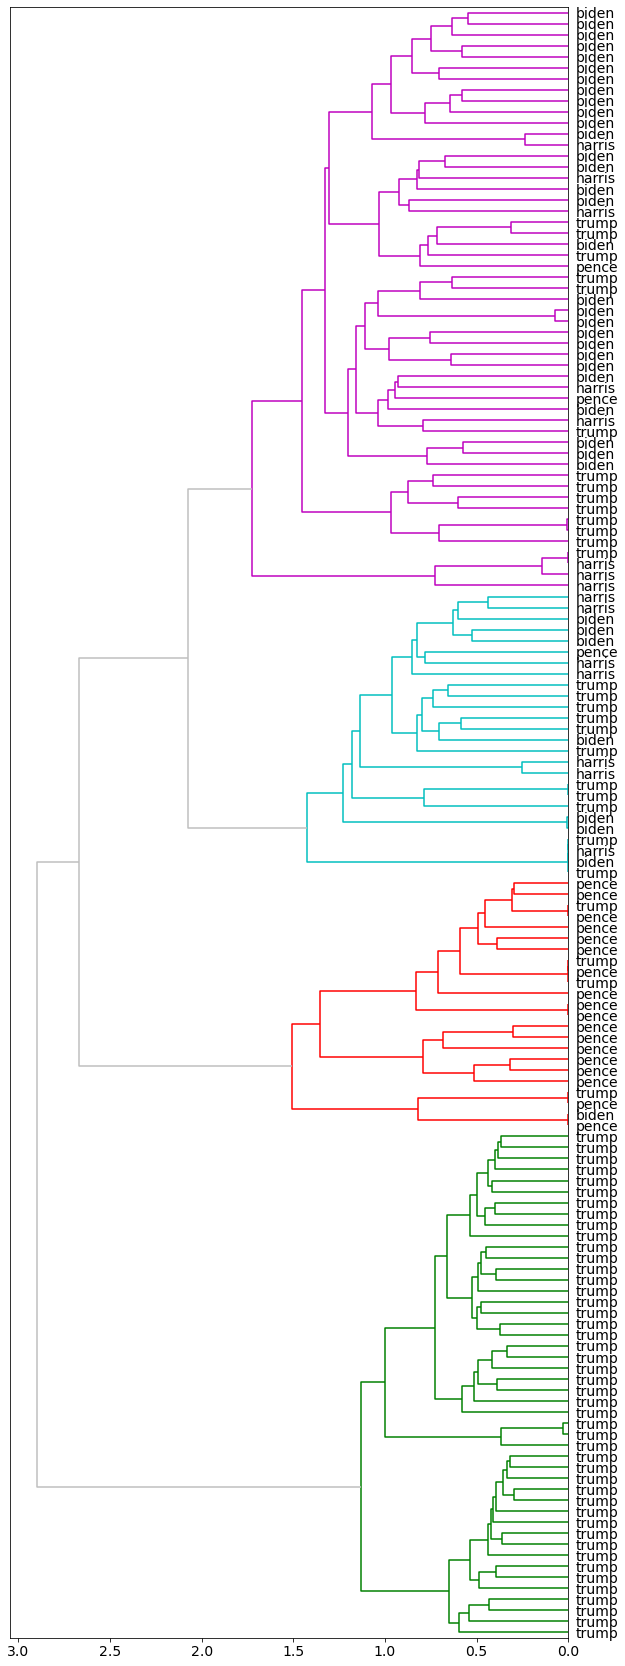

<Figure size 432x288 with 0 Axes>

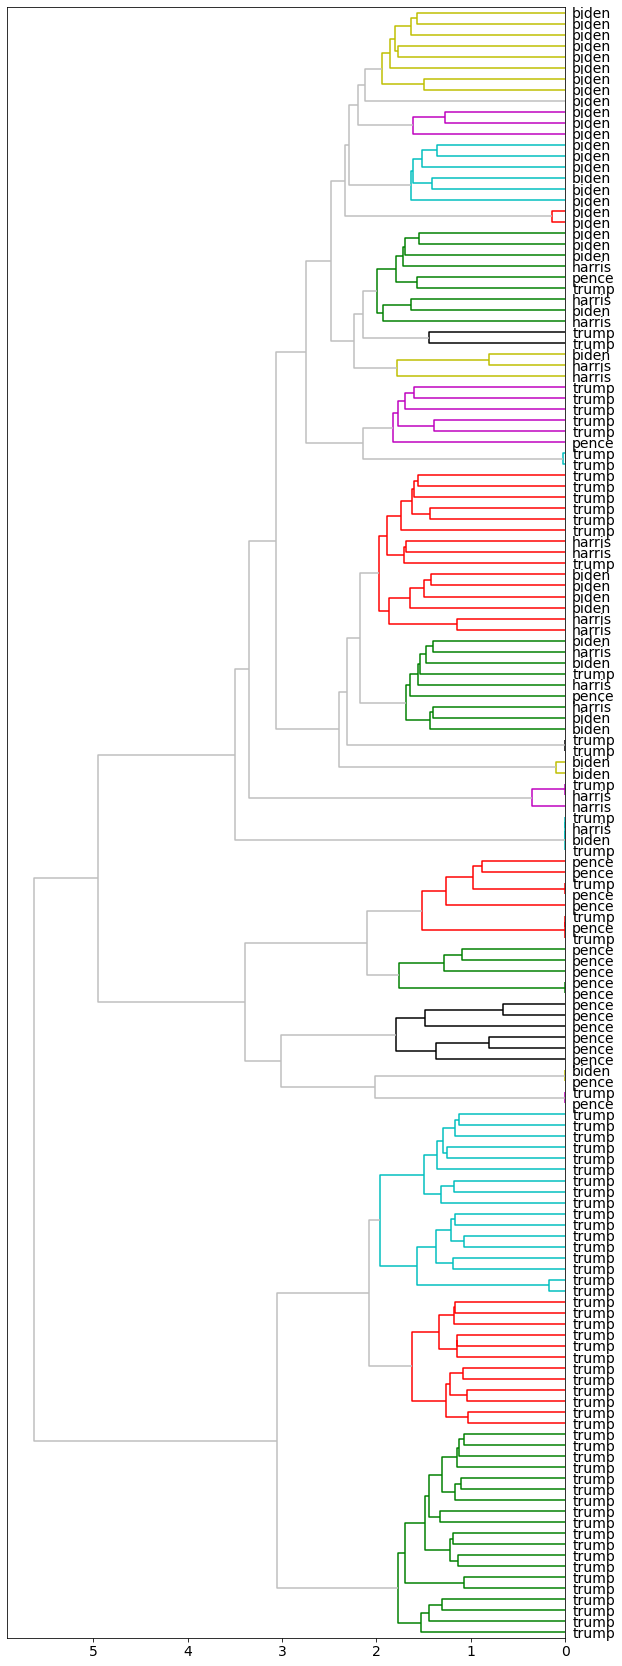

In [114]:
from scipy.spatial.distance import pdist
from matplotlib import pyplot as plt

L1 = all_sp.apply(lambda x: x / x.sum(), 1)

PAIRS = pd.DataFrame(index=pd.MultiIndex.from_product([bow.index.tolist(), bow.index.tolist()])).reset_index()
PAIRS = PAIRS[PAIRS.level_0 < PAIRS.level_1].set_index(['level_0','level_1'])
PAIRS.index.names = ['speech_a', 'speech_b']

PAIRS['cosine'] = pdist(L1, 'cosine')
PAIRS['cityblock'] = pdist(L1, 'cityblock')

hca(PAIRS['cosine'], color_thresh=2)
hca(PAIRS['cityblock'], color_thresh=2)

In [103]:
pdist(L1, 'cosine').shape

(10878,)

In [101]:
L1

,,know,people,going,president,like,said,great,one,right,want,...,especially since,people white,patriots thank,four weeks ago,tough questions,contracted coronavirus,joe biden voted,likely vote,called blue,still work
videoId,_speaker,,,,,,,,,,,,,,,,,,,,,
oWlLZZ8pcp8,trump,0.003806,0.003897,0.002748,0.001114,0.002370,0.004722,0.004852,0.002370,0.002435,0.002493,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Z6N1WdJgnLo,biden,0.002182,0.003536,0.001883,0.001934,0.001558,0.001281,0.000658,0.002182,0.001121,0.000845,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
WIwGrZKdsY0,trump,0.003914,0.005945,0.002502,0.000771,0.002795,0.003191,0.004590,0.002174,0.002425,0.003234,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
u-AEAq7jzcU,biden,0.004794,0.003311,0.000965,0.003306,0.000959,0.000985,0.001350,0.003036,0.000821,0.001040,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
GgINUxecNrg,trump,0.004777,0.004460,0.003177,0.001500,0.002559,0.001665,0.004412,0.001706,0.001928,0.003886,...,0.0,0.0,0.000369,0.000412,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TPYi8rZEOFo,trump,0.002376,0.001340,0.002324,0.004846,0.001154,0.001186,0.000717,0.000951,0.001116,0.000663,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
ytiJUCjZoNk,biden,0.003373,0.002440,0.001358,0.004186,0.001124,0.001848,0.000475,0.004946,0.003465,0.001951,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
xjxN225zvk4,pence,0.002121,0.001046,0.002847,0.005118,0.000707,0.001725,0.001026,0.001060,0.001180,0.000383,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [112]:
# Collocation - uses PMI (pointwise mutual information) to figure out 
# whether a bigram/trigram is better treated as a single "word"


In [191]:
# start with unigrams - just p(x)
pmi = counts_df.loc[:,[c for c in counts_df.columns.values if ' ' not in c]]
pmi = pmi.div(pmi.sum(axis=1), axis=0)


In [196]:
# bigrams - log(p(x,y) / (p(x)*p(y)))
pmi2 = counts_df.loc[:,[c for c in counts_df.columns.values if c.count(' ')==1 ]]
#pmi = pmi.div(pmi.sum(axis=1), axis=0)
def pxpy(xy_term):
    x, y = xy_term.name.split()
    #px = pmi[x] + 1e-60
    #py = pmi[y] + 1e-60
    return (pmi[x] + 1e-60) * (pmi[y] + 1e-60) # add a small value to avoid divide by zero

pmi2 = np.log2(pmi2.div(pmi2.apply(pxpy, axis=0), axis=0) + 1e-60)

In [199]:
pmi2.index.name = 'speech'
pmi2['videoId'] = bow.index.values
pmi2 = pmi2.set_index('videoId')
pmi2['_speaker'] = pmi2.apply(lambda x: bow.loc[x.name].speaker, 1)
pmi2 = pmi2.reset_index().set_index(['videoId','_speaker'])
pmi2s = pmi2.reset_index().drop(columns="videoId").groupby(['_speaker']).mean()
pmi2s = pmi2s.T.reset_index()
pmi2s.sort_values('biden', ascending=False).head(10)[['index']].values

array([['united states'],
       ['donald trump'],
       ['god bless'],
       ["we're going"],
       ['make sure'],
       ['every day'],
       ['states america'],
       ['american people'],
       ["i'm going"],
       ['joe biden']], dtype=object)

In [200]:
top10 = pd.DataFrame(pmi2s.sort_values('biden', ascending=False).head(10)[['index']].values)
top10.columns = ['biden']
top10['trump'] = pmi2s.sort_values('trump', ascending=False).head(10)[['index']].values
top10['harris'] = pmi2s.sort_values('harris', ascending=False).head(10)[['index']].values
top10['pence'] = pmi2s.sort_values('pence', ascending=False).head(10)[['index']].values
top10

,biden,trump,harris,pence
0,united states,united states,united states,donald trump
1,donald trump,thank much,donald trump,president donald
2,god bless,we're going,little bit,men women
3,we're going,years ago,joe biden,years ago
4,make sure,law enforcement,looks like,every day
5,every day,thank thank,they're going,american history
6,states america,long time,vice president,president trump
7,american people,white house,american people,united states
8,i'm going,great job,president united,law enforcement
9,joe biden,we're gonna,barack obama,four years


## Only bigrams

In [207]:
# create document-term count matrix
vectorizer = CountVectorizer(#max_features=5000, # only top 5k words
                             min_df=3,          # words must appear in this many speeches to count
                             max_df=0.9,        # words can't appear in more % of speeches than this.  
                             stop_words=stopwords.words('english'),
                             tokenizer=my_tokenizer,
                             ngram_range=(2,2)  # only bigrams
                            )
counts = vectorizer.fit_transform(bow['speech'])
counts_df = pd.DataFrame(counts.toarray())
counts_df.index.name = 'speech'
counts_df.columns = vectorizer.get_feature_names()

# convert counts into tfidf
transformer = TfidfTransformer(smooth_idf=False)
tfidf = transformer.fit_transform(counts)
# make it a nice df
tfidf_df = pd.DataFrame(tfidf.toarray())
tfidf_df.index.name = 'speech'
tfidf_df.columns = vectorizer.get_feature_names()
tfidf_df['videoId'] = bow.index.values
tfidf_df = tfidf_df.set_index('videoId')

# group by speaker and aggregate
tfidf_df['_speaker'] = tfidf_df.apply(lambda x: bow.loc[x.name].speaker, 1)
tfidf_df = tfidf_df.reset_index().set_index(['videoId','_speaker'])
# collapse to speaker-only
tfidf_speaker = tfidf_df.reset_index().drop(columns="videoId").groupby(['_speaker']).mean()
# Normalize doc vector lengths
tfidf_speaker = tfidf_speaker.apply(lambda x: x / norm(x), 1)
# transpose for easier filtering
tfidf_speaker = tfidf_speaker.T.reset_index()

# convert df to a handy top-10 comparison matrix
top10 = pd.DataFrame(tfidf_speaker.sort_values('biden', ascending=False).head(10)[['index']].values)
top10.columns = ['biden']
top10['trump'] = tfidf_speaker.sort_values('trump', ascending=False).head(10)[['index']].values
top10['harris'] = tfidf_speaker.sort_values('harris', ascending=False).head(10)[['index']].values
top10['pence'] = tfidf_speaker.sort_values('pence', ascending=False).head(10)[['index']].values
top10

,biden,trump,harris,pence
0,donald trump,we're going,senator graham,president donald
1,joe biden,thank much,affordable care,donald trump
2,we're going,united states,south carolina,four years
3,united states,we're gonna,care act,joe biden
4,make sure,great job,criminal justice,president trump
5,middle class,make america,like know,men women
6,i'm going,joe biden,trump party,trump white
7,child care,new york,health care,years president
8,states america,north carolina,donald trump,years means
9,may god,billion dollars,president trump,united states


In [72]:
# key phrases - a score for which terms each speaker uses that the others don't.
tfidf_speaker['biden2'] = tfidf_speaker.biden - (tfidf_speaker.harris + tfidf_speaker.pence + tfidf_speaker.trump)
tfidf_speaker['trump2'] = tfidf_speaker.trump - (tfidf_speaker.harris + tfidf_speaker.pence + tfidf_speaker.biden)
tfidf_speaker['harris2'] = tfidf_speaker.harris - (tfidf_speaker.trump + tfidf_speaker.pence + tfidf_speaker.biden)
tfidf_speaker['pence2'] = tfidf_speaker.pence - (tfidf_speaker.harris + tfidf_speaker.trump + tfidf_speaker.biden)

top10 = pd.DataFrame(tfidf_speaker.sort_values('biden2', ascending=False).head(10)[['index']].values)
top10.columns = ['biden']
top10['trump'] = tfidf_speaker.sort_values('trump2', ascending=False).head(10)[['index']].values
top10['harris'] = tfidf_speaker.sort_values('harris2', ascending=False).head(10)[['index']].values
top10['pence'] = tfidf_speaker.sort_values('pence2', ascending=False).head(10)[['index']].values
top10

,biden,trump,harris,pence
0,middle class,great job,senator graham,president donald
1,child care,fake news,affordable care,trump white
2,battle soul,thank much,south carolina,years means
3,"mr president,",sleepy joe,trump party,four years
4,across world,great people,care act,stand president
5,back better,going win,criminal justice,years president
6,god protect,history country,make case,president stands
7,protect troops,make america,million years,need four
8,clean energy,sanctuary cities,bring us,red tape
9,community college,air force,death penalty,promises made


## Only trigrams

In [208]:
# create document-term count matrix
vectorizer = CountVectorizer(#max_features=5000, # only top 5k words
                             min_df=3,          # words must appear in this many speeches to count
                             max_df=0.9,        # words can't appear in more % of speeches than this.  
                             stop_words=stopwords.words('english'),
                             tokenizer=my_tokenizer,
                             ngram_range=(3,3)  # only bigrams
                            )
counts = vectorizer.fit_transform(bow['speech'])
counts_df = pd.DataFrame(counts.toarray())
counts_df.index.name = 'speech'
counts_df.columns = vectorizer.get_feature_names()

# convert counts into tfidf
transformer = TfidfTransformer(smooth_idf=False)
tfidf = transformer.fit_transform(counts)
# make it a nice df
tfidf_df = pd.DataFrame(tfidf.toarray())
tfidf_df.index.name = 'speech'
tfidf_df.columns = vectorizer.get_feature_names()
tfidf_df['videoId'] = bow.index.values
tfidf_df = tfidf_df.set_index('videoId')

# group by speaker and aggregate
tfidf_df['_speaker'] = tfidf_df.apply(lambda x: bow.loc[x.name].speaker, 1)
tfidf_df = tfidf_df.reset_index().set_index(['videoId','_speaker'])
# collapse to speaker-only
tfidf_speaker = tfidf_df.reset_index().drop(columns="videoId").groupby(['_speaker']).mean()
# Normalize doc vector lengths
tfidf_speaker = tfidf_speaker.apply(lambda x: x / norm(x), 1)
# transpose for easier filtering
tfidf_speaker = tfidf_speaker.T.reset_index()

# convert df to a handy top-10 comparison matrix
top10 = pd.DataFrame(tfidf_speaker.sort_values('biden', ascending=False).head(10)[['index']].values)
top10.columns = ['biden']
top10['trump'] = tfidf_speaker.sort_values('trump', ascending=False).head(10)[['index']].values
top10['harris'] = tfidf_speaker.sort_values('harris', ascending=False).head(10)[['index']].values
top10['pence'] = tfidf_speaker.sort_values('pence', ascending=False).head(10)[['index']].values
top10

,biden,trump,harris,pence
0,united states america,thank much thank,affordable care act,president donald trump
1,battle soul nation,make america great,black lives matter,years president donald
2,build back better,new york times,criminal justice reform,four years president
3,may god protect,late term abortion,people south carolina,donald trump white
4,god protect troops,done great job,know i'm saying,four years means
5,bless may god,we're going win,united states senate,trump white house
6,god bless may,thank thank much,bring us together,first three years
7,thank thank thank,thank thank thank,president trump party,president donald trump.
8,beat donald trump,black lives matter,like know like,need four years
9,president united states,president united states,president united states,stand president donald


In [211]:
tfidf_speaker

_speaker,index,biden,harris,pence,trump
0,000 african americans,0.000000,0.000000,0.000000,0.007060
1,000 criminals onto,0.000000,0.000000,0.000000,0.006645
2,000 gang members,0.000000,0.000000,0.000000,0.009829
3,000 jobs right,0.000000,0.000000,0.008774,0.001312
4,000 manufacturing jobs,0.019316,0.000000,0.012691,0.004076
...,...,...,...,...,...
14413,zoe shout dress,0.001409,0.002864,0.000000,0.001342
14414,zones demanded american,0.000000,0.000000,0.000000,0.005932
14415,zones jobs investment,0.000000,0.000000,0.000000,0.005930
14416,zoom right right,0.001409,0.002864,0.000000,0.001342


In [70]:
# key phrases - a score for which terms each speaker uses that the others don't.
tfidf_speaker['biden2'] = tfidf_speaker.biden - (tfidf_speaker.harris + tfidf_speaker.pence + tfidf_speaker.trump)
tfidf_speaker['trump2'] = tfidf_speaker.trump - (tfidf_speaker.harris + tfidf_speaker.pence + tfidf_speaker.biden)
tfidf_speaker['harris2'] = tfidf_speaker.harris - (tfidf_speaker.trump + tfidf_speaker.pence + tfidf_speaker.biden)
tfidf_speaker['pence2'] = tfidf_speaker.pence - (tfidf_speaker.harris + tfidf_speaker.trump + tfidf_speaker.biden)

top10 = pd.DataFrame(tfidf_speaker.sort_values('biden2', ascending=False).head(10)[['index']].values)
top10.columns = ['biden']
top10['trump'] = tfidf_speaker.sort_values('trump2', ascending=False).head(10)[['index']].values
top10['harris'] = tfidf_speaker.sort_values('harris2', ascending=False).head(10)[['index']].values
top10['pence'] = tfidf_speaker.sort_values('pence2', ascending=False).head(10)[['index']].values
top10

,biden,trump,harris,pence
0,build back better,late term abortion,affordable care act,president donald trump
1,god protect troops,we're going win,people south carolina,years president donald
2,may god protect,thank much thank,criminal justice reform,donald trump white
3,bless may god,done great job,bring us together,trump white house
4,god bless may,thank thank much,know i'm saying,four years means
5,battle soul nation,billions billions dollars,like know like,four years president
6,beat donald trump,sleepy joe biden,president trump party,stand president donald
7,hope history rhyme,make america great,equal justice law.,need four years
8,mr. vice president,air force one,black lives matter,trump president stands
9,there's single thing,short period time,criminal justice system,i'm proud report
